<a href="https://colab.research.google.com/github/dfabrega2021/hello-world/blob/main/Day%201/%5BDATA-01E%5D%20Example%20-%20Tesla%20stock%20price%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DATA-01E] Example - Tesla stock price data

## Introduction

This example shows how to carry out an exploratory statistical analysis with the Pandas toolkit. It uses data on the Tesla Inc. (TSLA) stock prices in the Nasdaq stock market, for the years 2021-24, as published by Yahoo Finance (1,005 trading days).


## The data set

The data source is the file `tesla.csv`. The data come in the typical OHLC format (Open/High/Low/Close). The columns are:

* `date`, the date, as 'yyyy-mm-dd'.

* `open`, the price (US dollars) of the stock at the beginning of the trading day. It can be different from the closing price of the previous trading day.

* `high`, the highest price (US dollars) of the stock on that trading day.

* `low`, the lowest price (US dollars) of the stock on that day.

* `close`, the price (US dollars) of the stock at closing time, adjusted for splits.

* `adj_close`, the closing price (US dollars), adjusted for splits and dividend and/or capital gain distributions.

* `volume`, the amount of Tesla stock (number of shares) that has been traded on that day.

Source: `finance.yahoo.com/quote/TSLA/history`.

## Questions

Q1. Extract the data for the trading days previous to January 15th as a separate table.

Q2. Use a **line plot** to see whether there is a **time trend** in the opening price.

Q3. Use a line plot and a **histogram** to visualize the trading volume. What do you conclude?

Q4. A direct measure of **volatility** can be obtained as the difference of the highest price minus the lowest price in a given trading day. This is called the **daily price variation**. Add the daily variation of the Tesla stock prices as a new column to the data set. Do you see a trend in the daily price variation? How is the distribution?

Q5. Is there an **association** between the daily price variation and the trading volume? Is the volatility stronger the days in which more shares are traded?


## Importing the data

We import Pandas in the usual way:

In [ ]:
import pandas as pd

In this course, we use a remote data sources. The source files are stored in a GitHub repository. In Pandas, remote source files work the same as local files, the only difference being in the path. For the source files of our examples, the path is:


In [ ]:
path =

This path can be joined to the file name, as `path + 'tesla.csv'` (in Python, the plus sign `+` can be used to concatenate strings). Now, we import the data, as a Pandas data frame, with the function `read_csv()`. Don't forget that the path must match the current location of the data source file, either local or remote.

In [ ]:
df = pd.read_csv(path + 'tesla.csv')

This creates the data frame `df`. Since nothing has been specified about the index when importing the data, a `RangeIndex` has been assigned to the data frame `df`. This means that the first row has index 0, the second row has index 1, etc.

## Exploring the data

The report printed by the method `.info()` is probably the best way to start exploring a data frame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1004 non-null   object 
 1   open       1004 non-null   float64
 2   high       1004 non-null   float64
 3   low        1004 non-null   float64
 4   close      1004 non-null   float64
 5   adj_close  1004 non-null   float64
 6   volume     1004 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.0+ KB


The dimensions and the column names are what we expected. Since there are 1,004 index values and 1,004 non-null entries in every column, there are no missing values. Note that the column `date` has been imported by the function `read_csv()` as type `str` (reported as `object`). The numeric columns have been imported as either `int` or `float`, but this distinction is not relevant in this example.

We can take a look at the first rows with the method `.head()`. Nothing unexpected here.

In [ ]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2021-01-04,239.82,248.16,239.06,243.26,243.26,145914600
1,2021-01-05,241.22,246.95,239.73,245.04,245.04,96735600
2,2021-01-06,252.83,258.00,249.70,251.99,251.99,134100000
3,2021-01-07,259.21,272.33,258.40,272.01,272.01,154496700
4,2021-01-08,285.33,294.83,279.46,293.34,293.34,225166500


A statistical summary can be extracted with the method `.describe()`. Note that the column `date`, which is not numeric, is omitted.

In [ ]:
df.describe()

,open,high,low,close,adj_close,volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,242.784602,248.109552,237.092639,242.665199,242.665199,1.002799e+08
std,60.137350,61.634023,58.297154,60.015091,60.015091,4.023675e+07
min,103.000000,111.750000,101.810000,108.100000,108.100000,2.940180e+07
25%,200.160000,204.407500,195.117500,200.337500,200.337500,7.022625e+07
50%,235.690000,240.245000,232.070000,236.520000,236.520000,9.311910e+07
75%,273.100000,279.097500,266.617500,272.017500,272.017500,1.204181e+08
max,475.900000,488.540000,457.510000,479.860000,479.860000,3.065906e+08


## Q1. Data previous to January 15th

Filtering by date is common for this type of data. In Pandas, we can extract rows of a data frame by means of an expression that matches exactly these rows (in SQL, this is called a `WHERE` condition). For this question, that expression can be `df['date'] < '2021-01-15'`.

In [ ]:
filter_expr = df['date'] < '2021-01-15'
df[filter_expr]

,date,open,high,low,close,adj_close,volume
0,2021-01-04,239.82,248.16,239.06,243.26,243.26,145914600
1,2021-01-05,241.22,246.95,239.73,245.04,245.04,96735600
2,2021-01-06,252.83,258.00,249.70,251.99,251.99,134100000
3,2021-01-07,259.21,272.33,258.40,272.01,272.01,154496700
4,2021-01-08,285.33,294.83,279.46,293.34,293.34,225166500
5,2021-01-11,283.13,284.81,267.87,270.40,270.40,177904800
6,2021-01-12,277.00,289.33,275.78,283.15,283.15,138812100
7,2021-01-13,284.25,286.82,277.33,284.80,284.80,99937500
8,2021-01-14,281.13,287.67,279.58,281.67,281.67,93798900


## Q2. Line plot for the opening price

Analysts typically explore trends in stock prices. For the opening price, the corresponding column is extracted as the series `df['open']`. The method `.plot()` returns a line plot. The role of the parameters `figsize`, `color` and `linewidth` is clear. Though `linewidth=1` is a default argument, it has been explicitly included to call your attention.

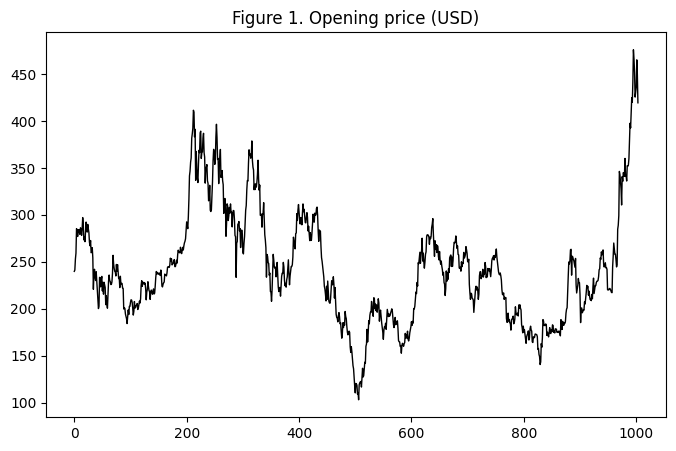

In [ ]:
df['open'].plot(figsize=(8,5), title='Figure 1. Opening price (USD)',
    color='black', linewidth=1);

In this case, the line plot does not show an obvious upwards trend, but a sequence of short trends, up and down.

*Note*. The semicolon at the end of the code input stops some irrelevant output showing up. It does not affect the plot.

## Q3. Line plot and histogram for the trading volume

The numbers for the trading volume are high, since it comes as a number of shares. In such cases, rescaling can improve the picture. Here, we express the volume in millions of shares:

In [ ]:
df['volume'] = df['volume']/10**6

A line plot for the trading volume can be obtained just as for the opening price.

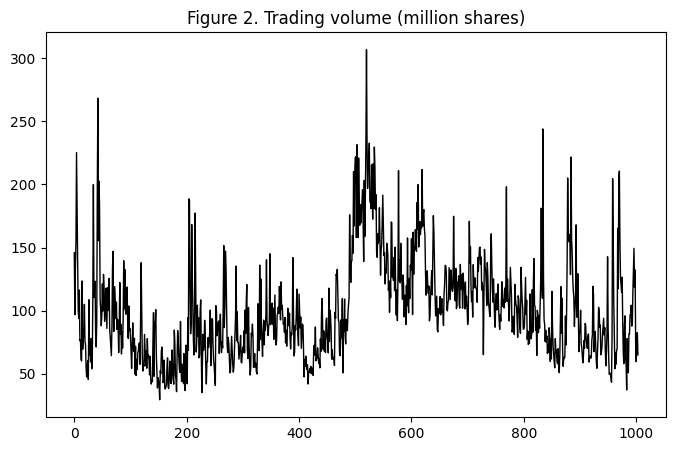

In [ ]:
df['volume'].plot(figsize=(8,5), title='Figure 2. Trading volume (million shares)',
    color='black', linewidth=1);

The trading volume looks quite **stationary**. So, it may make sense to look at the distribution of the daily volumes, as if they were extracted from a "population". The histogram is a quick and dirty graphical tool for viusualizing a statistical distribution.

In Pandas, the method `.plot.hist()` returns a histogram. The argument `edgecolor='white'` improves the picture (you may disagree), delineating the border of the histogram bars.

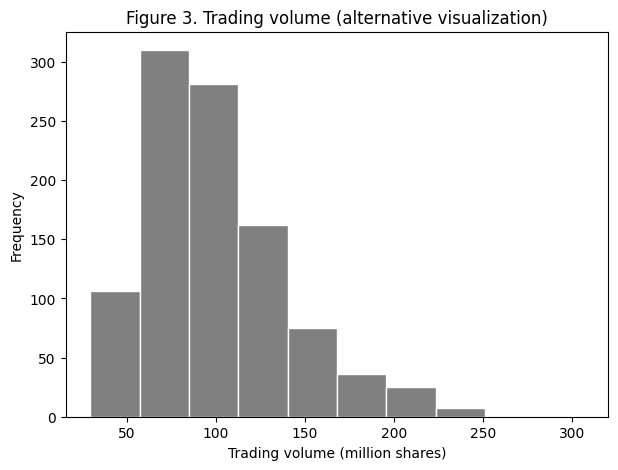

In [ ]:
df['volume'].plot.hist(figsize=(7,5),
    title='Figure 3. Trading volume (alternative visualization)',
    color='gray', edgecolor='white', xlabel='Trading volume (million shares)');

We don't see here the bell-shaped profile of the statisticians' beloved model, the **normal distribution**, but that of a **skewed distribution**. This type of distribution, with a well-defined **right tail**, is typical of variables whose values are amounts of money.


## Q4. Analysis of the daily price variation

We can calculate the daily price variation and keep it as a separate series, or add it as a new column to the current data frame `df`. We choose here the second option.


In [ ]:
df['dvar'] = df['high'] - df['low']

Now, when  displaying the heading rows of the new data frame, we see the new column on the right side.

In [ ]:
df.head()

,date,open,high,low,close,adj_close,volume,dvar
0,2021-01-04,239.82,248.16,239.06,243.26,243.26,145.9146,9.10
1,2021-01-05,241.22,246.95,239.73,245.04,245.04,96.7356,7.22
2,2021-01-06,252.83,258.00,249.70,251.99,251.99,134.1000,8.30
3,2021-01-07,259.21,272.33,258.40,272.01,272.01,154.4967,13.93
4,2021-01-08,285.33,294.83,279.46,293.34,293.34,225.1665,15.37



The line plot and the histogram are obtained as for the trading volume. The distribution of the trading volume is more skewed, with a longer right tail.


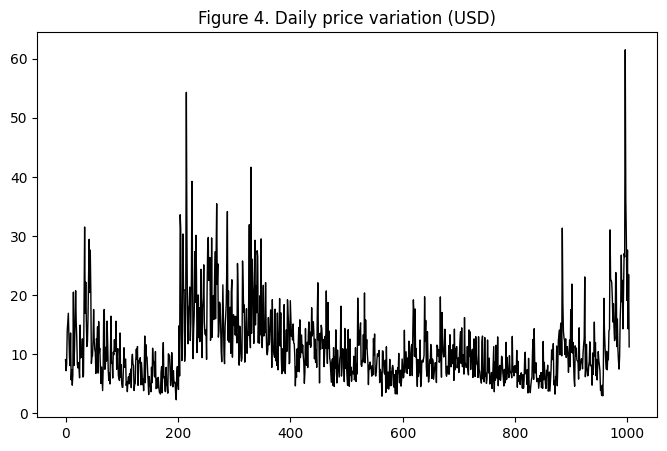

In [ ]:
df['dvar'].plot(figsize=(8,5), title='Figure 4. Daily price variation (USD)',
    color='black', linewidth=1);

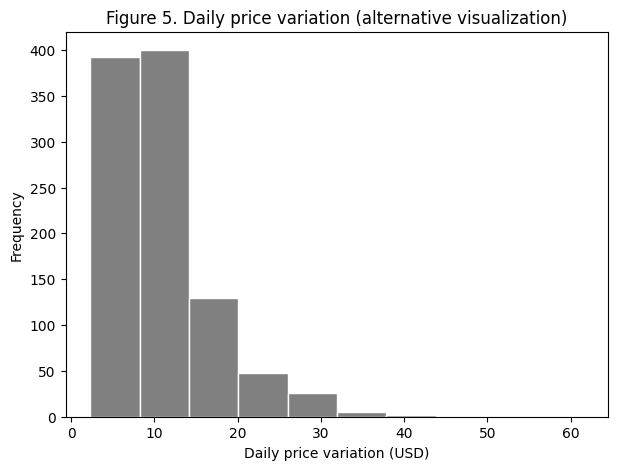

In [ ]:
df['dvar'].plot.hist(figsize=(7,5),
    title='Figure 5. Daily price variation (alternative visualization)',
    color='gray', edgecolor='white', xlabel='Daily price variation (USD)');

## Q5. Association between daily price variation and trading volume

Common wisdom tells us that price will show more intraday variation the days in which there is more trading activity, and less intraday variation with low activity. Though comparing line plots may give us an idea of this type of association, it is better to display together the two series in a **scatter plot**. We can get a scatter plot in Pandas with the method `.plot.scatter()`.

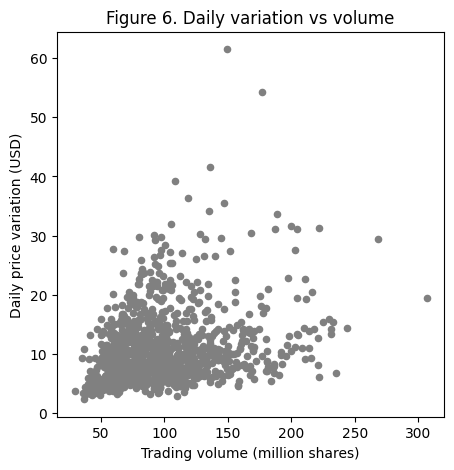

In [ ]:
df.plot.scatter(x='volume', y='dvar',
    title='Figure 6. Daily variation vs volume', figsize=(5,5), color='gray',
    xlabel='Trading volume (million shares)', ylabel='Daily price variation (USD)');

The scatter plot somewhat confirms our guess of a positive association between the trading volume and the daily variation, though the interpretation of plots is always subjective. To be objective, statisticians use the correlation to evaluate the strength of the association. More specifically, the correlation tells us the extent to which one series can be represented as a linear expression of the other series. The correlation can be positive or negative. A strong correlation is one which is close to 1 (or -1), and a weak correlation one which is close to 0.

In Pandas, correlations can be calculated with the method `.corr()`. In this case, though the correlation is weak, it confirms our guess.

In [ ]:
df['volume'].corr(df['dvar'])

np.float64(0.2570437411567959)

You may wonder why do you need so many decimals for a correlation. Indeed, correlations are better expressed with two (maybe three) decimals. You can get this with the method `.round()`.


In [ ]:
df['volume'].corr(df['dvar']).round(2)

np.float64(0.26)

*Note*. Don't pay attention to these numbers showing up as `np.float`. If you use the function `print()` on them, this will disappear.

## Homework

1. The **daily return** is the percentage change in the price with respect to the preceding trading day. If $p(t)$ is the price on day $t$, the corresponding return would be
$$r(t) =\frac{p(t) - p(t-1)}{p(t-1)}=\frac{p(t)}{p(t-1)}-1,$$
which can be multiplied by 100 to get percentage scale. Use the Pandas method `.pct_change()` to calculate the daily returns of the opening price. How is the distribution of the daily return of the opening price? Is there an association between the daily return and the trading volume?

2. Instead of calculating the daily return for the opening price as in the preceding exercise, which is the usual practice, calculate a daily return as the difference of the closing price minus the opening price (of the same day) as a percentage of the opening price. Perform a similar analysis and compare the results.

3. The opening price on a particular day is not the same as the closing price the day before. As a rule, is it higher or lower? Or there is no clear rule? How big can be the difference of the opening price tomorrow minus the closing price today, as a percentage of the closing price today?
